In [74]:
#basic int
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import pandas as pd

# Load the data to examine its contents
file_path = 'CSV_files/chemical-dependence-treatment-program-admissions-beginning-2007-1.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column information for an initial overview
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72463 entries, 0 to 72462
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        72463 non-null  int64 
 1   County of Program Location  72463 non-null  object
 2   Program Category            72463 non-null  object
 3   Service Type                72463 non-null  object
 4   Age Group                   72463 non-null  object
 5   Primary Substance Group     72463 non-null  object
 6   Admissions                  72463 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.9+ MB


(None,
    Year County of Program Location Program Category  \
 0  2017                     Albany           Crisis   
 1  2017                     Albany           Crisis   
 2  2017                     Albany           Crisis   
 3  2017                     Albany           Crisis   
 4  2017                     Albany           Crisis   
 
                        Service Type   Age Group Primary Substance Group  \
 0  Medically Managed Detoxification  18 thru 24                 Alcohol   
 1  Medically Managed Detoxification  18 thru 24              All Others   
 2  Medically Managed Detoxification  18 thru 24      Cocaine incl Crack   
 3  Medically Managed Detoxification  18 thru 24                  Heroin   
 4  Medically Managed Detoxification  18 thru 24           Other Opioids   
 
    Admissions  
 0          25  
 1           7  
 2           1  
 3          64  
 4          20  )

In [58]:
# Renaming columns for ease of access
data.columns = [
    "Year", "County", "Program_Category", 
    "Service_Type", "Age_Group", "Substance_Group", "Admissions"
]

# Checking for and removing duplicates, general cleaning up
data_cleaned = data.drop_duplicates()

string_columns = ["County", "Program_Category", "Service_Type", "Age_Group", "Substance_Group"]
data_cleaned[string_columns] = data_cleaned[string_columns].apply(lambda col: col.str.title())
data.head()


,Year,County,Program_Category,Service_Type,Age_Group,Substance_Group,Admissions
0,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Alcohol,25
1,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,All Others,7
2,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Cocaine incl Crack,1
3,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Heroin,64
4,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Other Opioids,20


In [59]:
# keeping only 'County' and 'Admissions' columns
data = data[['County', 'Admissions']]
data.head()


,County,Admissions
0,Albany,25
1,Albany,7
2,Albany,1
3,Albany,64
4,Albany,20


In [60]:
# Group by 'County' and calculate total admissions per county
county_admissions = data.groupby('County', as_index=False)['Admissions'].sum()
county_admissions.head()


,County,Admissions
0,Albany,83567
1,Allegany,3668
2,Bronx,259759
3,Broome,32467
4,Cattaraugus,8427


In [61]:
# keeping only counties 'Erie' and 'Westchester'
county_admissions_filtered = county_admissions[county_admissions['County'].isin(['Erie', 'Westchester'])]
county_admissions_filtered


,County,Admissions
14,Erie,176357
58,Westchester,164414


In [62]:
# Define population values for Erie and Westchester
populations = {
    'Erie': 925528,
    'Westchester': 980244
}
# Add the 'Population' column
county_admissions_filtered['Population'] = county_admissions_filtered['County'].map(populations)
county_admissions_filtered


C:\Users\jakef\AppData\Local\Temp\ipykernel_40832\505696789.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_admissions_filtered['Population'] = county_admissions_filtered['County'].map(populations)


,County,Admissions,Population
14,Erie,176357,925528
58,Westchester,164414,980244


In [63]:
# Adding 'Total treatment facilities' column with explicit .loc assignment
county_admissions_filtered = county_admissions_filtered.copy()  # Create a deep copy to avoid warnings
county_admissions_filtered['Total treatment facilities'] = 0
county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Erie', 'Total treatment facilities'] = 32
county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Westchester', 'Total treatment facilities'] = 35
county_admissions_filtered
import pandas as pd


,County,Admissions,Population,Total treatment facilities
14,Erie,176357,925528,32
58,Westchester,164414,980244,35


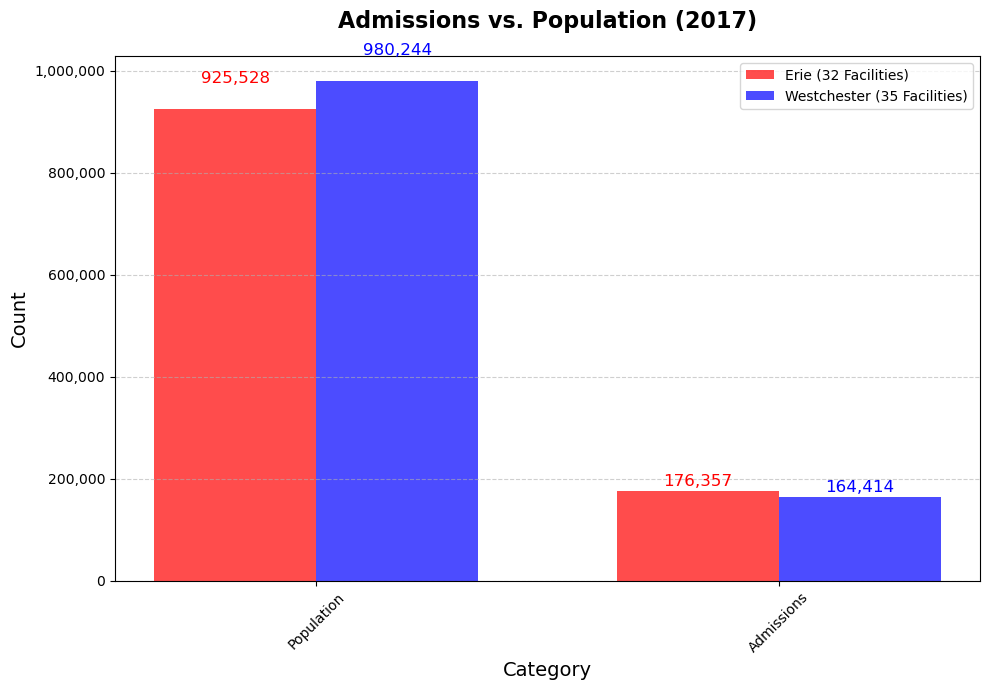

In [99]:
# Creating the DataFrame as specified
data = {
    'County': ['Erie', 'Westchester'],
    'Admissions': [176357, 164414],
    'Population': [925528, 980244]
}
county_admissions_filtered = pd.DataFrame(data)

# Adding 'Total treatment facilities' column
county_admissions_filtered['Total treatment facilities'] = 0
county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Erie', 'Total treatment facilities'] = 32
county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Westchester', 'Total treatment facilities'] = 35

# Extracting values for the bar plot
erie_population = county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Erie', 'Population'].values[0]
erie_admissions = county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Erie', 'Admissions'].values[0]
westchester_population = county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Westchester', 'Population'].values[0]
westchester_admissions = county_admissions_filtered.loc[county_admissions_filtered['County'] == 'Westchester', 'Admissions'].values[0]

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 7))
bar_width = 0.35
x = np.arange(2)  # Only two categories to compare (Population, Admissions)

# Plotting bars for Erie
plt.bar(x - bar_width/2, [erie_population, erie_admissions], 
        width=bar_width, label='Erie (32 Facilities)', color='red', alpha=0.7)

# Plotting bars for Westchester
plt.bar(x + bar_width/2, [westchester_population, westchester_admissions], 
        width=bar_width, label='Westchester (35 Facilities)', color='blue', alpha=0.7)

# Adding number labels on top of the bars
plt.text(x[0] - bar_width/2, erie_population + 50000, f"{erie_population:,}", ha='center', fontsize=12, color='red')
plt.text(x[1] - bar_width/2, erie_admissions + 10000, f"{erie_admissions:,}", ha='center', fontsize=12, color='red')
plt.text(x[0] + bar_width/2, westchester_population + 50000, f"{westchester_population:,}", ha='center', fontsize=12, color='blue')
plt.text(x[1] + bar_width/2, westchester_admissions + 10000, f"{westchester_admissions:,}", ha='center', fontsize=12, color='blue')

# Formatting the y-axis labels with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))

# Updating the title and adjusting position
plt.title('Admissions vs. Population (2017)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=x, labels=['Population', 'Admissions'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
